## Download and prepare the dataset

Set up the posits as default

In [21]:
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()

'posit160'

In [22]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:4000].reshape((4000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images[:400].reshape((400, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:4000])
test_labels = to_categorical(test_labels[:400])

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [23]:
train_images.shape

(4000, 28, 28, 1)

## Download and prepare the dataset

In [24]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))


model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

Let's display the architecture of our convnet so far:

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [26]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=6)

model.compile(optimizer='adam',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.1,callbacks=[earlystop_callback])

Epoch 1/50


29/29 [==============================] - 2s 56ms/step - loss: 2.2705 - accuracy: 0.0972 - val_loss: 2.3096 - val_accuracy: 0.0975
Epoch 2/50
29/29 [==============================] - 2s 60ms/step - loss: 2.2754 - accuracy: 0.1042 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 3/50
29/29 [==============================] - 2s 55ms/step - loss: 2.2754 - accuracy: 0.1125 - val_loss: 2.3223 - val_accuracy: 0.0975
Epoch 4/50
29/29 [==============================] - 2s 56ms/step - loss: 2.2754 - accuracy: 0.1039 - val_loss: 2.3018 - val_accuracy: 0.1750
Epoch 5/50
29/29 [==============================] - 2s 58ms/step - loss: 2.2305 - accuracy: 0.1866 - val_loss: 2.1816 - val_accuracy: 0.2025
Epoch 6/50
29/29 [==============================] - 2s 58ms/step - loss: 2.0664 - accuracy: 0.2039 - val_loss: 2.0723 - val_accuracy: 0.2100
Epoch 7/50
29/29 [==============================] - 2s 57ms/step - loss: 2.0000 - accuracy: 0.2178 - val_loss: 2.0244 - val_accuracy: 0.1974
Epoch 8/50
29/29 [======

**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

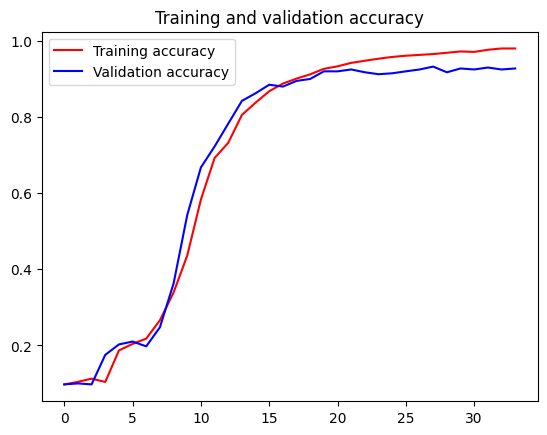

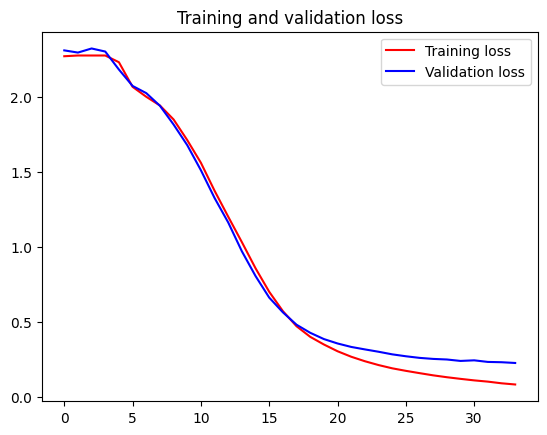

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

13/13 [==============================] - 0s 13ms/step - loss: 0.2345 - accuracy: 0.9199


In [30]:
test_acc

0.919922

In [31]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.00139236, 5.96046e-05, 0.000129223, 0.0493164, 5.44786e-05,
        0.947266, 0.000206947, 0.000580788, 0.00123405, 0.000694275]],
      dtype=posit160)

In [32]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]
first_layer_weights

array([[-0.0804138, -0.0808105, -0.0809021, ..., -0.0810242, -0.0809021,
        -0.0805054],
       [-0.0801697, -0.079895, -0.079895, ..., -0.0800781, -0.0803528,
        -0.0800781],
       [-0.0804749, -0.0804138, -0.0810242, ..., -0.0804443, -0.0803528,
        -0.080719],
       ...,
       [-0.0810242, -0.0808411, -0.0800476, ..., -0.0802612, -0.0801086,
        -0.0809326],
       [-0.0809021, -0.0802612, -0.0801392, ..., -0.0809326, -0.0803833,
        -0.0809021],
       [-0.0804138, -0.0798645, -0.0809937, ..., -0.0801697, -0.0802917,
        -0.0805664]], dtype=posit160)